In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

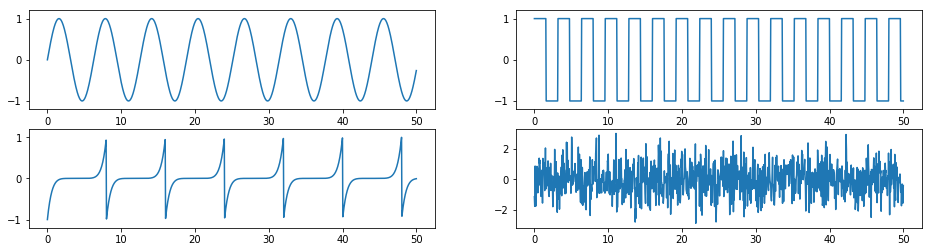

In [51]:
# 产生源信号数据，4路源信号
x = np.linspace(0,50,1000)
s1 = np.sin(x)
s2 = np.array([(-1)**(k // 32) for k in range(1000)])
s3 = np.power((x % 8 - 4) / 4.,7)
s4 = np.random.randn(1000)
source = np.vstack([s1,s2,s3,s4])

#绘制图形
plt.figure(figsize=(16,4))

plt.subplot(221)
plt.plot(x,s1)
plt.ylim(-1.2,1.2)

plt.subplot(222)
plt.plot(x, s2)
plt.ylim(-1.2, 1.2)

plt.subplot(223)
plt.plot(x, s3)
plt.ylim(-1.2, 1.2)

plt.subplot(224)
plt.plot(x, s4)

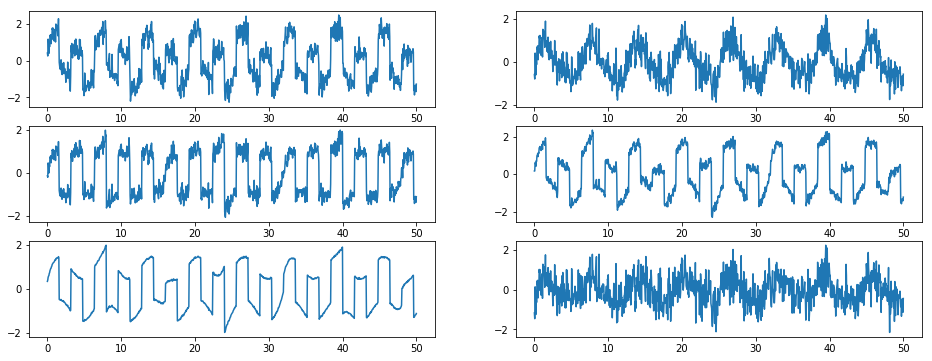

In [52]:
# 使用混合矩阵A混合各路数据，混合为6路
A = np.random.rand(24).reshape(4,6)
X = np.dot(source.T,A)

# 绘制混合信号数据
plt.figure(figsize=(16, 6))

for num in range(6):
    plt.subplot(321+num)
    plt.plot(x,X[:,num])

In [53]:
# 使用FastICA进行独立成分分析
from sklearn.decomposition import PCA,FastICA
ica = FastICA(fun='logcosh',n_components=4)
x_ica = ica.fit_transform(X)


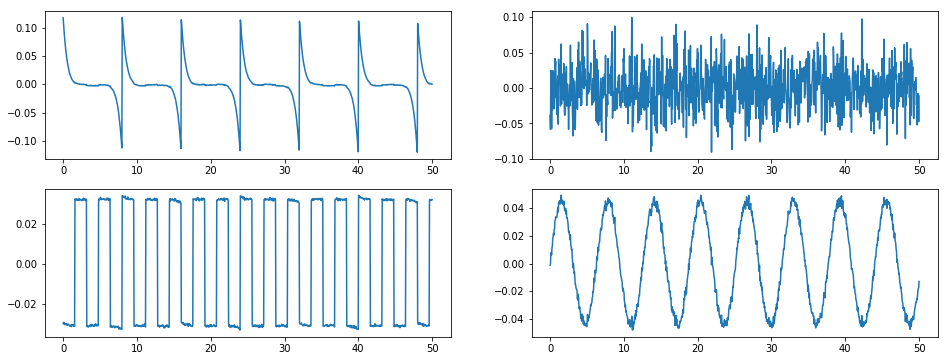

In [54]:
dim = x_ica.shape[1]
plt.figure(figsize=(16,6))

for i in range(dim):
    plt.subplot(221+i).plot(x,x_ica[:,i])

In [55]:
#联合使用PCA和ICA
#FastICA可以使用PCA作数据预处理，也可以自己做处理以指定主成分个数（独立成分个数）
np.corrcoef(X.T)

array([[1.        , 0.68448348, 0.90142804, 0.9776099 , 0.94970777,
        0.54021769],
       [0.68448348, 1.        , 0.36931277, 0.63582107, 0.49368456,
        0.91833922],
       [0.90142804, 0.36931277, 1.        , 0.89490935, 0.9278037 ,
        0.31484589],
       [0.9776099 , 0.63582107, 0.89490935, 1.        , 0.98510539,
        0.44799125],
       [0.94970777, 0.49368456, 0.9278037 , 0.98510539, 1.        ,
        0.30190076],
       [0.54021769, 0.91833922, 0.31484589, 0.44799125, 0.30190076,
        1.        ]])

In [56]:
# 使用PCA对混合信号进行降维
pca = PCA(n_components=6,whiten=True)
x_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([8.30805924e-01, 1.39993673e-01, 2.54250935e-02, 3.77531031e-03,
       6.81016206e-33, 2.76386971e-33])

In [57]:
pca = PCA(n_components=4,whiten=True)
x_pca = pca.fit_transform(X)

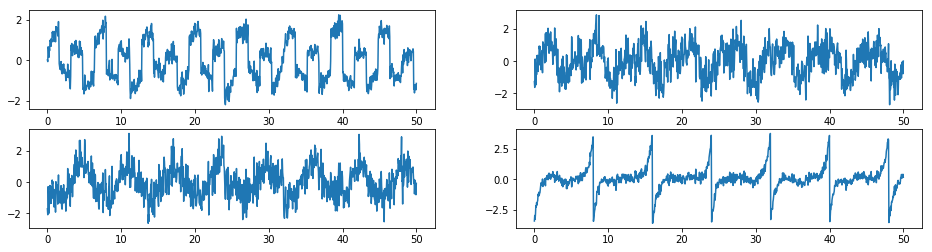

In [58]:
# 绘制PCA降维后的混合信号
plt.figure(figsize=(16, 4))
for i in range(dim):
    plt.subplot(221 + i).plot(x, x_pca[:, i])


In [59]:
# 对PCA降维后的混合信号进行ICA独立成分分解
pca_ica = FastICA(n_components=4,fun='logcosh')
x_ica = pca_ica.fit_transform(x_pca)


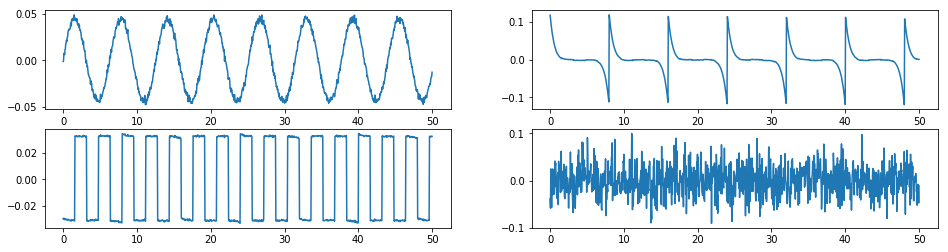

In [60]:
plt.figure(figsize=(16,4))

for i in range(dim):
    plt.subplot(221+i).plot(x,x_ica[:,i])

In [62]:
#使用cities_10.csv进行降维练习
import os
os.chdir('C:/Users/acerpc/Desktop/data_folder')
cities = pd.read_csv('cities_10.csv',skipinitialspace=True,encoding='gbk')
cities

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


In [63]:
city_ica = FastICA(n_components=2,whiten=True)
factor = city_ica.fit_transform(cities.loc[:,'X1':])
factor

array([[-0.11743717, -0.11460898],
       [-0.12039322,  0.35761084],
       [-0.25078249, -0.079245  ],
       [ 0.16444928, -0.44590228],
       [-0.02484243,  0.36496375],
       [ 0.83348617, -0.12751628],
       [ 0.02633933,  0.10460623],
       [-0.10851666, -0.20495164],
       [ 0.01456695,  0.54206683],
       [-0.41686975, -0.39702346]])

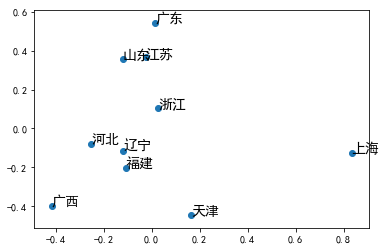

In [68]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(factor.T[0],factor.T[1])

for x,y,l in zip(factor[:,0],factor[:,1],cities['AREA']):
    plt.text(x,y,l,fontsize=14)